# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [1]:
#time.sleep() bottom of for loop, measures in seconds 

city_name = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
county = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_url = url + "units=" +units+ "&appid=" + weather_api_key + "&q="

#processing_record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities: 
    
    query_url = f"{city_url}{city}"
#     print (query_url)
    
    try: 
        response = requests.get(query_url)
        weather_json = response.json() 
        city_name.append(weather_json["name"])
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        max_temperature.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        time.sleep(1)
        
#processing_record += 1

    except: 
        print("City not found. Skipping......")

print(f"-------------------------------")
print(f"Data Retrival Complete")
print(f"--------------------------------")

NameError: name 'weather_api_key' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
#define country

weather_dataframe = pd.DataFrame({"City": city_name, 
                                "Latitude": latitude, 
                                "Longitude": longitude, 
                                "Max Temperature": max_temperature,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Wind Speed": wind_speed,
                                "County": country,
                                "Date": date})

weather_dataframe.head()

weather_data.to_csv(weather_dataframe.csv)

NameError: name 'pd' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#filter over 100% humidity
#clean df with cities less than humidity 

weather_dataframe.loc[weather_dataframe["Humidity"] > 100]
weather_dataframe

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Hasaki,35.7333,140.8333,57.20,94,75,16.11,1613350448
1,Labuhan,-6.8844,112.2051,80.35,80,91,5.28,1613350449
2,Barstow,34.8986,-117.0228,60.80,13,1,14.97,1613350450
3,Samandağ,36.0842,35.9771,44.60,100,0,3.44,1613350451
4,Puerto Ayora,-0.7393,-90.3518,75.99,94,58,1.99,1613350452
...,...,...,...,...,...,...,...,...
556,Atar,20.5169,-13.0499,68.63,23,0,11.23,1613351088
557,Potchefstroom,-26.7167,27.1000,65.79,87,65,4.43,1613351089
558,Kamaishi,39.2667,141.8833,37.40,87,75,2.30,1613351089
559,Kieta,-6.2167,155.6333,84.87,73,97,8.72,1613351090


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

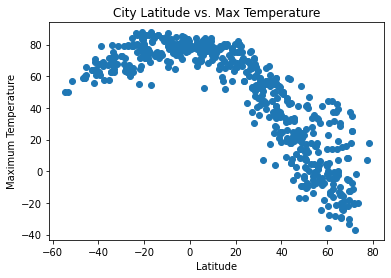

In [11]:
plt.scatter(weather_dataframe["Latitude"], weather_dataframe["Max Temperature"], marker = "o")


plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Maximum Temperature")
plt.xlabel("Latitude")

plt.savefig("latitude_temperature")

plt.show()


City Latitude vs. Max Temperature analyzes the latitude, from both southern and northern hemisphere, affects the maximum temperature for those cities. From this plot we can see the city's latitude does correlate to the maximum temperature.

## Latitude vs. Humidity Plot

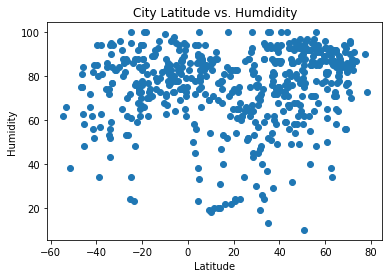

In [10]:
plt.scatter(weather_dataframe["Latitude"], weather_dataframe["Humidity"], marker = "o")

plt.title("City Latitude vs. Humdidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("latitude_humidity")

plt.show()


City Latitude vs. Humidity plot analyzes the correlation between the city's latitude and the effect on humidity (in percent). There does not appear to be a correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

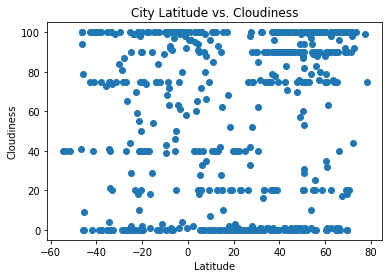

In [12]:
plt.scatter(weather_dataframe["Latitude"], weather_dataframe["Cloudiness"], marker = "o")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("latitude_cloudiness")

plt.show()


Latitude vs. Cloudiness plot attemps to show the relation between a city's latitue and the percent of cloud cover. 
This graph shows there is not a significant correlation between a city's latitude and the percent of cloud cover due to the city's latitude and the varying data points for cloudiness.  

## Latitude vs. Wind Speed Plot

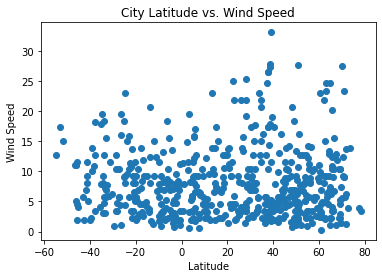

In [13]:
plt.scatter(weather_dataframe["Latitude"], weather_dataframe["Wind Speed"], marker = "o")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig("latitude_wind")

plt.show()
 

Latitude vs. Wind Speed scatter plot analyzes the correlation between a city's latitude and the wind speed in miles per hour. The plot demonstrates there is not a significant correlation between a city's lattitude and the wind speed. 

## Linear Regression

In [15]:
northern_hemp = weather_dataframe.loc[weather_dataframe["Latitude"] >= 0.0]

southern_hemp = weather_dataframe.loc[weather_dataframe["Latitude"] < 0.0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y=-1.42x+90.89
The r value is: 0.7618839098874481


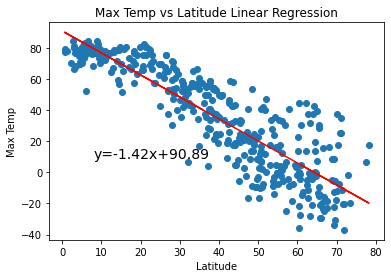

In [16]:
x_values = northern_hemp["Latitude"]
y_values = northern_hemp["Max Temperature"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_temperature_northern")


The latitude of cities only in the northern hemisphere vs maximum temperature shows the effect of latitude on the maximum temperature. The r-value is high which indicates there is a significant correlation between where a city's is located and the maximum temperature that city will have. This correlation is negative stating, the increase in latitude (the further a city in from the equator in the northern hempishere) there is a decrease in temperature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y=0.42x+82.73
The r value is: 0.4420932620634477


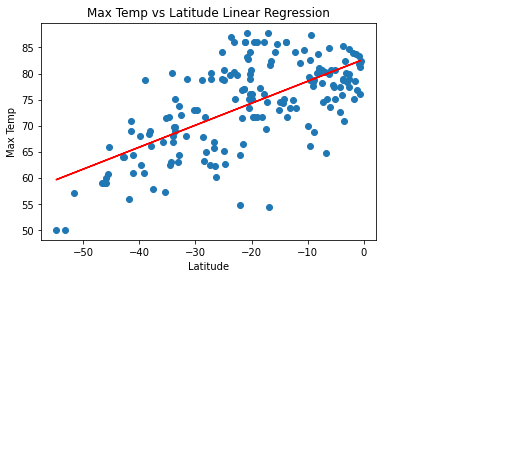

In [17]:
x_values = southern_hemp["Latitude"]
y_values = southern_hemp["Max Temperature"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_temperature_southern")


The latitude of cities only in the southern hemisphere vs maximum temperature shows the effect of latitude on the maximum temperature. The r-value is high which indicates there is a significant correlation between where a city's is located and the maximum temperature that city will have. This correlation is positive stating, the closer a city is to the equator, the higher the maximum temperature with be for that city.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y=0.25x+65.03
The r value is: 0.06994613042476412


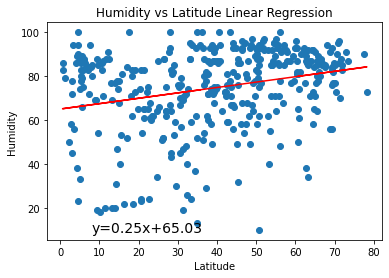

In [18]:
x_values = northern_hemp["Latitude"]
y_values = northern_hemp["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_humidity_northern")

Humidity vs Latitude linear regression shows the effect a city's latitude to the humidity of that city, specially only in the northern hemisphere. These variables have a relatively low r-value which states there is some correlation; however, there is a chance for outliers and cities to not fit within the linear regression. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y=0.31x+83.19
The r value is: 0.08491199014247805


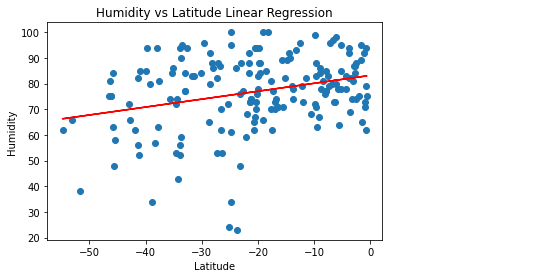

In [19]:
x_values = southern_hemp["Latitude"]
y_values = southern_hemp["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_humidity_southern")

Humidity vs Latitude linear regression shows the effect a city's latitude to the humidity of that city, specially only in the southern hemisphere. These variables have a r-value of almost zero which states there is almost no correlation between where a city is located in the southern hemisphere and the humdity of that city. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y=-0.15x+43.47
The r value is: 0.03448098709062071


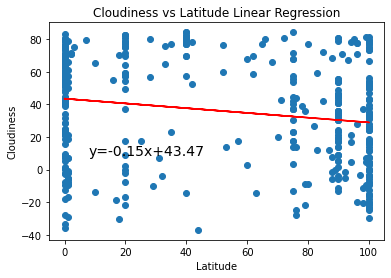

In [20]:
x_values = northern_hemp["Cloudiness"]
y_values = northern_hemp["Max Temperature"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_cloudiness_northern")

Cloudiness vs. Latitude in the northern hemisphere linear regression analyzes the effect of a city's latitude in the northern hemisphere and the rate of cloudiness in that city. With a r-value of near zero this shows there is not a correlation between where a city is located in the northern hemisphere and cloudiness which may occur in that city. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y=0.42x+82.73
The r value is: 0.4420932620634477


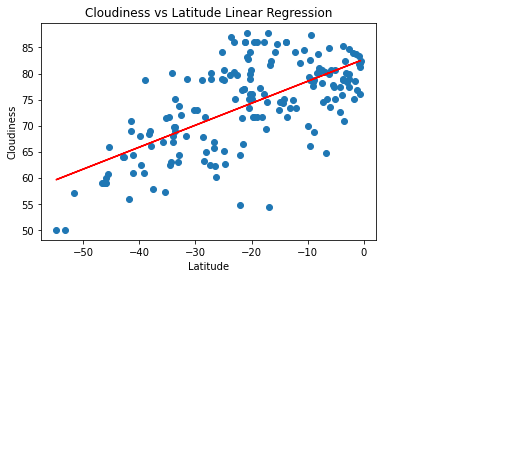

In [21]:
x_values = southern_hemp["Latitude"]
y_values = southern_hemp["Max Temperature"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_cloudiness_southern")

Cloudiness vs. Latitude in the southern hemisphere analyzes cities in the southern hemisphere's latitude and the effect on the cloudiness that city may experience. With an r-value of around .4 there is some correlation between where a city in located in the southern hemisphere and the cloud cover in that city; however, there can still be outliers and cities which do not fit into the correlation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y=0.0x+8.16
The r value is: 1.8884388020876996e-06


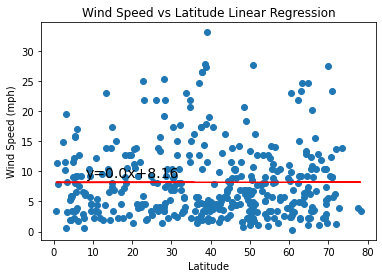

In [22]:
x_values = northern_hemp["Latitude"]
y_values = northern_hemp["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_wind_northern")

Wind speed vs. latitude for cities in the northern hemisphere analyzes wind speeds for cities located in the northern hemisphere. There is almost no correlation between where a city is located in the northern hemisphere and the wind speed a city may experience. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y=-0.09x+5.74
The r value is: 0.06062543586685977


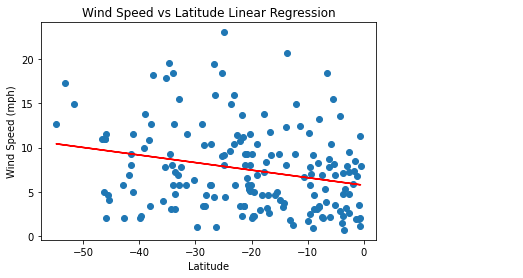

In [23]:
x_values = southern_hemp["Latitude"]
y_values = southern_hemp["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (8,9), fontsize = 14, color = "black")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")

plt.savefig("latitude_wind_southern")

Wind speed vs. latitude in the southern hemisphere analyzes the correlation between cities located in the southern hemisphere and the wind speed in those cities. The r-value demonstrates there is a very low correlation between cities in the southern hemisphere and the wind speed of those cities; however, there is more correlation between cities in the southern hemisphere and wind speed than cities in the northern hemisphere. 

3 Observable Trends: 
1. Out of all the plots which were analyzed, where a city was located (both for northern hemisphere and southern hemisphere) the strongest correlation was the maximum temperature for those cities. 
2. There were difference between the hemispheres and different variables. For example, cloudiness in the northern hemisphere had an r-value of near 0 where cloudiness in the southern hemisphere showed some correlation with an r-value around .4. 
3. Latitude and the effect of humidity for both the southern hemisphere and northern hemisphere had a very similar r-value. Demonstrating the humidity has about the same effect in both hemispheres. 